# Lab Six: Convolutional Neural Networks

Arely Alcantara, Emily Fashenpour

## 1. Data Analysis & Preparation

### 1.1 Business Understanding

With the constant rise of technologies, and new personal recognition techniques - most corporations are leaning into using facial detection and recognition. Apple has incorporated face ID instead of touch ID, so that a user is clearly aware and willing to unlock their phone. Other companies are steering away from ID badges and instead are using face detection for building access, and other tasks that used to require ID swiping. However, the reliability and the accuracy of the facial recognition technologies is not perfect. For example, I (Emily) was able to use FaceID to unlock my twin sister's iPhone. Therefore, we believe that it is necessary that these machine learning and artificial intelligence models work appropriately and accurately as to avoid impersonation by others that sometimes lead to identity theft, privacy concerns, among others concerns.
The dataset we selected to analyze is made up of real and fake images - where real images are unedited, raw pictures of a human face, while the 'fake' images are edited or altered images of a human face with a different nose or different eye color, etc. Many of the altered images seem to have been edited to have smoother skin or changing the size of features. There is a total of 2,041 pictures in the entire dataset. We want to predict if an image is real or altered - as well as see how accurate the model is in detecting that. The dataset contains images of the real unedited person as well as the edited version of the image.
A third party that might be interested in this would be Instagram as spam accounts are usually created, and this model would help against that and only have original and 'verified' or real users.
We believe that in order for a third party to consider this useful, the prediction algorithm has to be very accurate, enough to be able to recognize minor edits to an image. Our model would have to perform fairly well for it to be useful because if users see to many spam accounts on Instagram, they might resort to using Snapchat or TikTok or any other social media platform that limits spam accounts. Companies wanting to market themselves will also be delighted to see that Instagram's user base is made of unique individuals and they will want to partner with Instagram and advertise throughout them. Instagram is one of the top social medias now so they do not want to have spam users that might make others feel uncomfortable. Every move that Instagram makes is important and they must decide wisely and do what's best for their company and their user needs. We believe that by using our model they would be enhancing their users' security as well as making themselves more reputable and liked by third parties. 

Dataset URL: https://www.kaggle.com/ciplab/real-and-fake-face-detection

Prediction task: Real or fake image of a human face? With what degree of accuracy can we say that?

In [4]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import os, sys
import cv2

real = os.listdir('real/')
fake = os.listdir('fake/')

print('Working with {0} images of real faces'.format(len(real)))
print('Working with {0} images of fake/edited faces'.format(len(fake)))
print('Working with a total of {0} faces'.format(len(real) + len(fake)))

images = []
labels = []

for image_path in real:
    img = cv2.imread('real/' + image_path, 0)
    img = cv2.resize(img, (250, 250))
    img_size = img.shape
    img = img.flatten()
    images.append(img)
    labels.append(0)
    
for image_path in fake:
    img = cv2.imread('fake/' + image_path, 0)
    img = cv2.resize(img, (250, 250))
    img = img.flatten()
    images.append(img)
    labels.append(1)
    
images = np.array(images)
labels = np.array(labels)
print('All images are 600 x 600 pixels and they are resized to 250 x 250. After linearizing each image, the image vector has dimensions of:')
print(img_size)
print('Combining all the 2041 vectorized images into one numpy array gives the following dimensions:')
images.shape

Working with 1081 images of real faces
Working with 960 images of fake/edited faces
Working with a total of 2041 faces
All images are 600 x 600 pixels and they are resized to 250 x 250. After linearizing each image, the image vector has dimensions of:
(250, 250)
Combining all the 2041 vectorized images into one numpy array gives the following dimensions:


(2041, 62500)

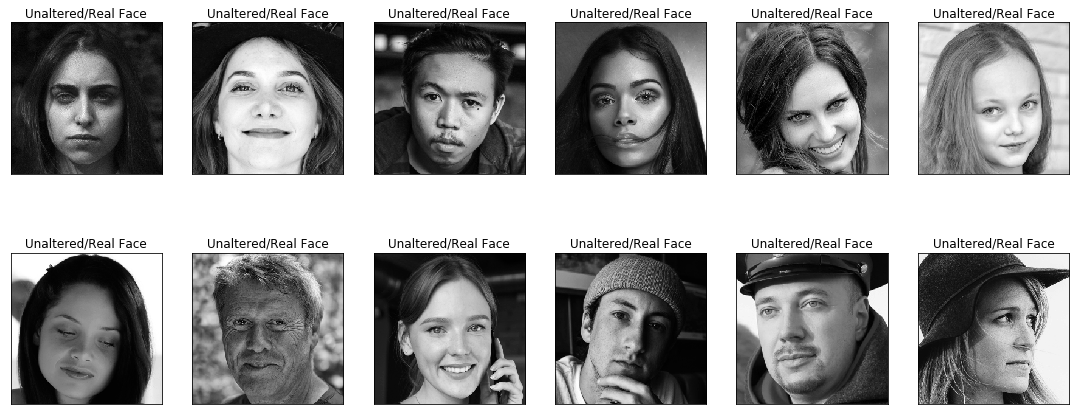

In [5]:
#show some real images of human faces
#from matplotlib import pyplot as plt

n_row=2
n_col=6
plt.figure(figsize=(2.5 * n_col, 3.1 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
real = 0
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(images[real].reshape((250, 250)), cmap=plt.cm.gray)
    real += 1
    plt.title("Unaltered/Real Face")
    plt.xticks(())
    plt.yticks(())

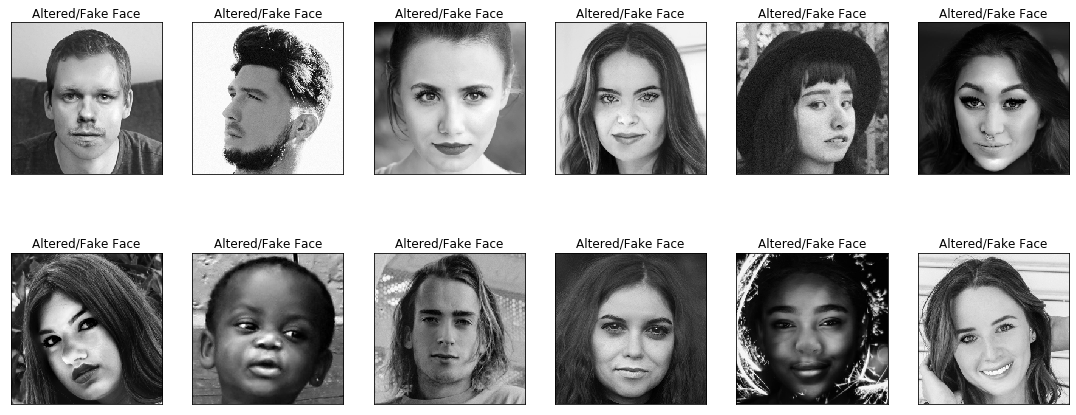

In [6]:
#show some fake images too        
n_row=2
n_col=6
plt.figure(figsize=(2.5 * n_col, 3.1 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
fake = 1500
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(images[fake].reshape((250, 250)), cmap=plt.cm.gray)
    fake += 1
    plt.title("Altered/Fake Face")
    plt.xticks(())
    plt.yticks(())

### 1.2 Evaluation Metrics

As we have mentioned before, we will like to be very accurate in the way that we determine whether an image is a real or fake face. We will be using accuracy to measure the performance of our model. We would also like to use precision in order to see how precisely our model performs. We chose accuracy because it is very important that our model classifies an image correctly and accuracy really captures both true/false positives and negatives. And we want Instagram to have a well performing model to flag spam accounts and so they can get those taken down.

### 1.3 Dividing data into training and testing sets

Since we have a total of 2,041 images, we will be using a stratified shuffle split, since the images were read in by having real images be the top half, and fake images be the bottom half. Our dataset is somewhat small so we want to make sure that we are selecting our samples strategically as to get the output and performance that we desire.

In [10]:
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression

#select model
clf = LogisticRegression()
X = images
y = labels
#select cross validation
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


## 2. Modeling

## 3. Additional Analysis

We submited the assignment before December 1st (:

## References

- https://www.kaggle.com/ciplab/real-and-fake-face-detection